In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib

def get_root_path():
    try: 
        # the case of a normal python file
        root_path = os.path.abspath(__file__)
    except:
        # the case of notbook, where the __file__ nees to be in quotes
        root_path = os.path.dirname(os.path.abspath("__file__"))
    return pathlib.Path(root_path).parent

root_path = get_root_path()
root_path

PosixPath('/Users/pcv439/Documents/Projects/SODAS-project-management-reproducible-science/example-project')

In [2]:
df = pd.read_parquet(root_path / 'data/processed_data/president_polls.parquet')

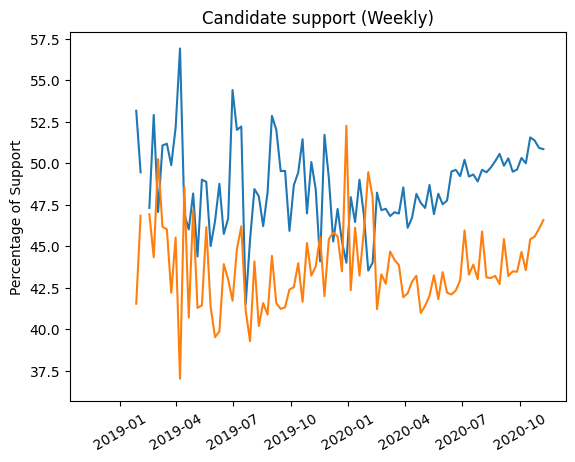

In [3]:
plt.plot(
    df.loc[df.candidate_name == 'Joe Biden'].resample(rule='W', on='end_date')['pct'].mean(), label="Joe Biden"
)
plt.plot(
    df.loc[df.candidate_name == 'Donald Trump'].resample(rule='W', on='end_date')['pct'].mean(), label="Donald Trump"
)

plt.xticks(rotation=30)
plt.ylabel("Percentage of Support")
plt.title("Candidate support (Weekly)")
plt.savefig(root_path / "output/figures/weekly_candidate_support.pdf")

In [4]:
support_mean = (
    df.loc[(df.candidate_name == "Joe Biden") | (df.candidate_name == "Donald Trump")]
    .groupby('candidate_name')[['pct']]
    .mean()
    .reset_index()
    .rename(columns={'candidate_name': "Candidate Name", 'pct': "Percentage Support"})
    
)

support_mean.to_latex(
    root_path / 'output/tables/candidate_suppport.tex', 
    index=False,
    float_format="%.2f"
)